# Compare the analytical solution and the neural net mask

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import sys
sys.path.append("..")
import os
from utils.model import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters, get_parameters_1
import torch
import numpy as np
import matplotlib.pyplot as plt

In [18]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2, tensor_Q_m2, sigma2_eps2, tau22 = get_parameters_1()
data_generator = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)
data_generator2 = Data(tensor_mu_m2, tensor_Sigma_m2, tensor_mu_eps2, tensor_Sigma_eps2)

In [19]:
tensor_raw = data_generator.get_tensor_data(1, [2.5, -1, 2.5], [0, 2, 9])

tensor([ 0.1260,  0.0014,  0.0587, -0.7163,  0.0760,  0.0227,  0.0198,  0.0201,
         0.0194, -0.0927], grad_fn=<SliceBackward0>)
tensor([ 9.3540e-01, -2.8517e-01, -1.1691e-01, -3.3846e-02,  4.5369e-04,
         2.0611e-02,  1.0881e-02, -5.3399e-02, -1.1451e-01, -2.7633e-01],
       grad_fn=<SliceBackward0>)
tensor([ 2.8327e-01, -2.4203e-01,  3.1334e-01, -8.4083e-03, -1.6769e-01,
         8.7801e-01,  2.9613e-01, -1.3143e-01,  5.7010e-04, -5.1913e-03],
       grad_fn=<SliceBackward0>)
tensor([-0.4739,  0.0181, -0.0787, -0.2907, -0.4338, -0.1640,  0.0187, -0.2705,
         0.4453, -0.3346], grad_fn=<SliceBackward0>)


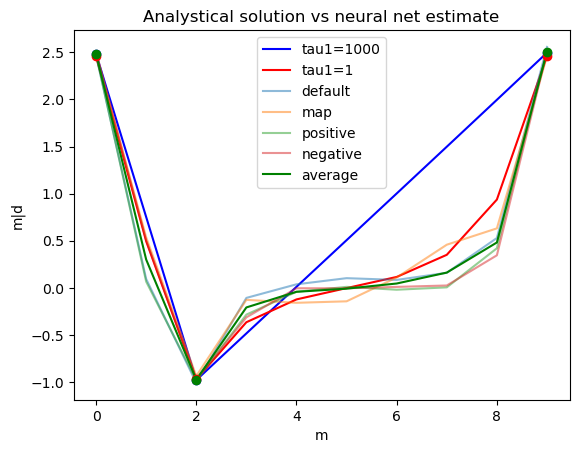

In [20]:
# Getting tensor
n_param = 10
input_tensor = tensor_raw[0]
d = input_tensor[:10]
mask = input_tensor[10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
post_mean, _ = data_generator.get_tensor_posterior(input_tensor)
post_mean2, _ = data_generator2.get_tensor_posterior(input_tensor)

# Plotting model estimates
outer_dir = 'B'
rootdir = "../saved_models/" + str(outer_dir)
model = Net_mask()
names = []
for subdir, dirs, files in os.walk(rootdir):
    folders = dirs
    count = len(folders)
    break

plt.plot(range(10), post_mean, 'b')
plt.plot(range(10), post_mean2, 'r')
sum_tensor = torch.zeros(n_param)
for f in folders: 
    name = '../saved_models/' + str(outer_dir) + '/' + str(f) + '/' + 'model_weights.pth'
    model.load_state_dict(torch.load(name))
    model.eval()
    print(list(model.parameters())[0][0][:10])
    out_raw = model(tensor_raw)
    out = out_raw[0].detach()
    #print(out.size())
    #print(out)
    sum_tensor += out
    #plt.plot(range(10), post_mean)
    #plt.plot(range(10), out)
    #out = out + torch.randn(10)*0.01

    #if f == '0':
    #    plt.plot(range(10), out, 'g')#, 'o')
    #    plt.plot(location, out[location_raw], 'go')
    #else:
    #    plt.plot(range(10), out, '--', alpha=0.5)#, 'o')
    plt.plot(range(10), out, alpha=0.5)#, 'o')

    #plt.plot(location, out[location_raw], 'o')
    #names.append(str(f))
    #print(out)
plt.plot(range(10), sum_tensor/count, 'g')
plt.title("Analystical solution vs neural net estimate")
plt.xlabel("m")
plt.ylabel("m|d")
plt.legend(['tau1=1000', 'tau1=1', 'default', 'map', 'positive', 'negative', 'average'])
plt.plot(location, post_mean[location_raw], 'bo')
plt.plot(location, post_mean2[location_raw], 'ro')
plt.plot(location, (sum_tensor/count)[location_raw], 'go')
names.append("Analytical tau2=1000")
names.append("Analytical tau=1")
names.append("MAP mean")
#plt.legend(names)
#plt.legend()